# Minimizing a Univariate Function 

The general concept of "optimization" is one of the most important that you'll encounter in engineering.  Generally speaking, your goal in optimization is to maximize or minimize ***something***, and the types of things you may want to maximize or minimize take many, many forms. But the basic concepts of optimization are relatively simple, and the strategy we use is always roughly the same. You will construct a model that predicts the value you are trying to optimize: let's call it an ***objective function***, though you may also hear it referred to as a ***loss function*** or a ***cost function*** depending on the specific type of minimization problem or sub-field where you encouter optimization. 

In general, our ***objective function*** will depend on many variable inputs.  Our goal in optimization is to find the value(s) of those inputs that either minimize or maximize the value of our objective function.

What are some concrete examples of things you might want to maximize or minimize? 

How about profit? The profit obtained by a process is typically a complex function of raw material costs, sale prices, volume sold, capital costs, and operating costs. A very common goal is to figure out the scale your process should operate at (i.e., what volume) in order to maximize profit.  This is an example of an objective function that we'd like to maximize by finding the volume that gives us the best balance of revenue and expenses.  It is not always evident what that solution is since objective functions can be very complex. Moreover, we may be bound by several constraints on the system--it might be essential that we supply at least 100,000 units to meet our current orders. 

Another example might be a new medical device - perhaps its overall cost to the patient is a complex function of size, materials and power supply...but you also have the constraint that you are providing the device for use in remote locations that don't have reliable access to medical care...so it needs to have a lifetime of at least 5 years because it cannot be replaced easily. You may need to minimize that cost by varying materials of construction, power supply, and size while still meeting the constraint that you can only replace it once every few years due to sparse availability of medical care in the area where you're working.

These are just examples to get you thinking about how frequently we are looking to either minimize or maximize a function. Again, that objective function may represent the cost of your product, the profit from your technology, the toxicity of a drug, or almost any other quantity you might want to either minimize or maximize. Because this is such a common goal, optimization is an essential skill for anyone working with data analysis and modelling, and there is a nice suite of optimization tools already built into Python. To use them, all we really need to know is how to define an objective function and tweak our solver options. But first, we'll learn a little about how the methods work because it is always good to know what is under the hood. 

In this Module, we will focus on optimizing a value returned by a univariate *scalar* function, i.e., a model that has a single input and returns a single output.  In the next Module, we'll extend the methods to consider optimization of multivariate scalar functions. Finally, here we will focus on using numerical methods to optimize nonlinear problems. If you need to optimize a linear system, consider taking a course in linear algebra and linear programming methods.

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import time

## Locating extrema in a function (analytical solution)

Let's start with a basic idea: we are trying to find extrema (either a minimum or a maximum value) returned by a univariate scalar function. We already learned how to do this analytically in our calculus courses, right?  We just find where the derivative of our function is equal to zero!

It's always nice to start out with a problem that we can solve analytically, so let's look at a cubic polynomial. 

$$y(x) = -1.6x^3 + 5x^2 + 8x - 23$$

We know that we can expect, at most, 3 real roots for this polynomial, and we can expect at most 2 extrema (either maxima or minima). In the cell below, graph this function on the domain $x = [-2.3, 4]$; plot the x-axis to visualize the root locations, and find any roots in that domain using an algorithm of your choice.

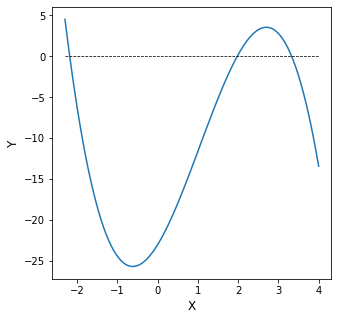

In [2]:
y = lambda x: -1.6*x**3 + 5*x**2 + 8*x - 23
xset = np.linspace(-2.3, 4, 100)

## Graphing function
plt.figure(1, figsize = (5,5))
plt.plot(xset, y(xset))
plt.hlines(0, -2.3, 4, linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.show()

I can see from the graph that there are 3 roots at *roughly* x = -2, x = 2, and x = 3.5.  I will provide each of these to the `opt.newton()` solver as initial guesses alongside my function `y`.  Once you get the hang of programming in Python, you see that you can do things like leverage your skills with for loops or (in this example) list comprehensions in order to streamline solving a nonlinear equation for multiple initial guesses.

In [3]:
xguess = [-2, 2, 3.5]
roots  = [opt.newton(y, x0) for x0 in xguess]
print(f'The roots are located at x = {np.round(roots, 3)}')

The roots are located at x = [-2.183  1.978  3.33 ]


According to my results, the roots of this function are x = -2.183, x = 1.978, and x = 3.330. From the graph, I can see clearly that these roots are entirely different from the locations of the extrema - the maxima and minima. This is just to drive home the point that root finding (Module 09) and optimization (this Supplement) are two entirely different things. Looking at the graph, I can see that there is a minimum somewhere around $x = -1$, where $y \approx -25$ or so.  There is also a maximum somewhere around $x = 3$, where $y \approx 3$. 


```{info}
**Important**: These locations are what we refer to as **local minima** and **local maxima**.  They are the lowest and highest values in their immediate vicinity, but it is clear that if we consider the function at $x < -2.23$ and $x > 4$, we can find larger and smaller values of y. The absolute minimum and maximum value of a function would be referred to as **global optima**.  For this function, there are no global optima as the function increases continuously below x = -1 or so, and it decreases continuous above x = 3 or so.
```

While a graphical analysis is usually informative, we can be more precise in our solution by finding the roots of the derivative of y(x), i.e., by solving:

$$y^{\prime}(x) = -4.8x^2 + 10x + 8 = 0$$

Take your pick of solution method and solve this equation in the cell below.

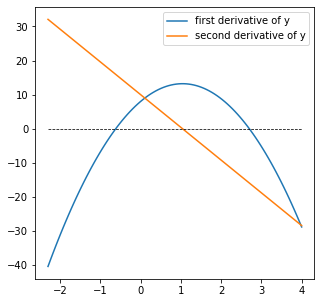

In [4]:
yp = lambda x: -4.8*x**2 + 10*x +8
ypp = lambda x: -9.6*x + 10

plt.figure(1, figsize = (5,5))
plt.plot(xset, yp(xset), label = 'first derivative of y')
plt.plot(xset, ypp(xset), label = 'second derivative of y')
plt.hlines(0, -2.3, 4, linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.legend()
plt.show()

In [5]:
xguess = [-1, 3]
opts   = [opt.newton(yp, x0) for x0 in xguess]
print(f'Extrema in this function are located at x = {np.round(opts, 3)}')
print(f'The extrema in the function have the values y = {np.round(y(np.array(opts)), 2)}')
print(f'The second derivative of the function at these locations are ypp = {np.round(ypp(np.array(opts)), 2)}')

Extrema in this function are located at x = [-0.617  2.701]
The extrema in the function have the values y = [-25.66   3.56]
The second derivative of the function at these locations are ypp = [ 15.92 -15.92]


I find that the two roots of the $y^\prime(x)$ are $x = -0.617$ and $x = 2.7$. At these locations $y^{\prime}(x) = 0$. Further, I can evaluate the function here: $y(-0.617) = -25.66$ and $y(2.7) = 3.56$. To determine if it is a maximum or a minimum in calculus, we would consider the second derivative.  At $x = -0.617$, $y^{\prime\prime}(x) = 15.9$, which indicates that the slope is increasing so this is a local minimum. At $x = 2.7$, $y^{\prime\prime}(x) = -15.9$, which means the slope is decreasing at this point and we have a local maximum. This is consistent with our graphical analysis. 

Great! We've fully explored the analytical solution! Let's make sure our numerical methods match up. We'll start by writing our own optimization algorithm, which gives us some insight into how this works.  

### Newton Iteration

Newton was a super rad dude. So it's not surprising that he also has a method for finding the minimum of a function using an interative strategy. It is actually very similar to a Newton-Raphson iteration, except we use the first derivative and second derivative of the function instead of the first derivative and the function value. The general formula:

$$x_{i+1} = x_i - \frac{f^\prime(x_i)}{f^{\prime\prime}(x_i)}$$

Based on that expression, you can see that iterations will converge once the ***derivative*** of the function is zero, which is the criteria we typically look for in finding extrema in a function. In contrast, a Newton-Raphson root finding iteration converges when the ***function itself*** is zero.

Similar to a Newton-Raphson algorithm, this Newton's method looks like something we could implement in a loop! We won't worry right now about finding a maximum or minimum specifically, just extrema in general. To do that, all we need to do is let the while loop proceed until our derivative value is close enough to zero that we are satisfied.  It may not be completely clear how to do this just yet, so we'll walk through this example together.  Just as a refresher, we'll use lambda functions to define the function itself, `y`, its first derivative, `dy`, and its second derivative `ddy`. But note, you can also use the long form function definitions using the def keyword:  there is nothing magic about a lambda function other than convenience!  Once you've done that, you can write the Newton Iteration as a while loop:

Go ahead and run this for a couple of initial guesses and watch the algorithm find the extrema in this function.

In [6]:
y   = lambda x: -1.6*x**3 + 5*x**2 + 8*x - 23
dy  = lambda x: -3*1.6*x**2 + 10*x + 8
ddy = lambda x: -2*3*1.6*x + 10

x = 10.0
while abs(dy(x)) > 1e-8:
    print(round(x,4), round(y(x),4), round(dy(x),4))
    x = x - dy(x)/ddy(x)   

10.0 -1043.0 -372.0
5.6744 -108.9467 -89.8111
3.655 -5.089 -19.5741
2.8748 3.3068 -2.9219
2.7088 3.5567 -0.1323
2.7005 3.5572 -0.0003


If you want an extra visualization of its progress, you can modify the code to illustrate the progress made on each iteration:

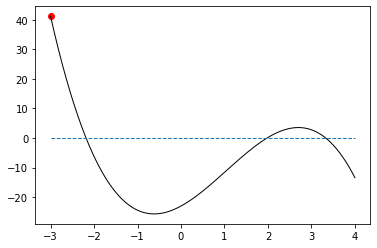

-3 41.2 -65.2


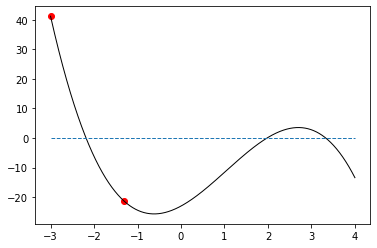

-1.3196 -21.1736 -13.5542


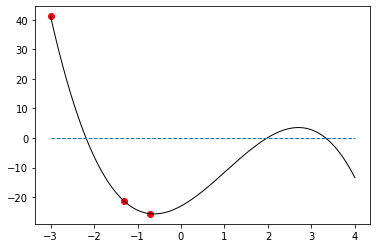

-0.7216 -25.568 -1.7162


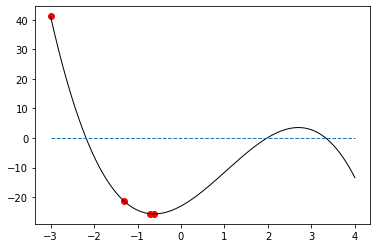

-0.6203 -25.6567 -0.0493


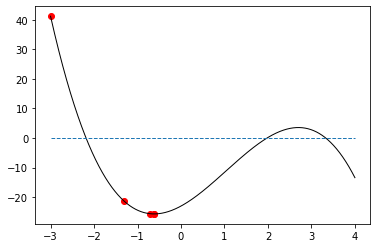

-0.6172 -25.6567 -0.0


In [7]:
y   = lambda x: -1.6*x**3 + 5*x**2 + 8*x - 23
dy  = lambda x: -3*1.6*x**2 + 10*x + 8
ddy = lambda x: -2*3*1.6*x + 10

xrange = [-3, 4]
yrange = [0, 0]
xplot  = np.linspace(xrange[0], xrange[1], 10000)
yplot  = y(xplot)

x = -3
xlist = []
ylist = []
while abs(dy(x)) > 1e-8:
    xlist.append(x)
    ylist.append(y(x))
    plt.plot(xplot,yplot,color = 'black', linewidth = 1)
    plt.plot(xrange,yrange, linestyle = 'dashed', linewidth = 1)
    plt.scatter(xlist, ylist, color = 'red', marker = 'o')
    plt.show()
    print(round(x,4), round(y(x),4), round(dy(x),4))
    #time.sleep(2) #Add a 2 second pause before going on to next iteration
    x = x - dy(x)/ddy(x)

## Optimization Routines in Scipy

As with root finding in the last exercise, I don't recommend we write our own minimization routines outside of doing so to learn more about how they work. In general, it can be difficult to get optimization routines to converge rapidly and stably, and more sophisticated methods are available in the Scipy.optimize package. 

https://docs.scipy.org/doc/scipy/reference/optimize.html

```{note}
Our very simple Newton method above found extrema without distinguishing between maxima and minima.  It was only looking for a place where the derivative = 0. Scipy optimization algorithms will always ***minimize*** your objective function by default.  If you want to ***maximize*** a function, you can always just multiply the value returned by your objective function by -1.
```

### `opt.minimize_scalar()`

The usage for scipy optimization algorithms is very similar to what we learned with root finding for scalar functions.  Let's start with the most basic option:  minimizing a univariate, scalar function, i.e., the case we are currently considering:

$$y(x) = -1.6x^3 + 5x^2 + 8x - 23$$

Since y(x) is univariate, we are really just looking for the value of x where y is at a minimum. If all you need to do is find a local minimum in a univariate function, you can use `opt.minimize_scalar()` from `scipy`. It has a very small set of minimum inputs: you only need to provide it with the function, and it will return a local minimum.

```python
opt.minimize_scalar(function_name)
```
    
Here we just run `opt.minimize_scalar(y)`
    
For this very simple minimization, you should see that it returns both our minimum x location and the minimum function value.  You can consult the scipy docs above for options that you can provide to `opt.minimze_scalar()`; most of them are passed using keyword arguments as we did with `opt.newton()`, `opt.brentq()`, etc in Module 09.

In [8]:
opt.minimize_scalar(y)

     fun: -25.656739046884304
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 11
 success: True
       x: -0.6171691124890302

### Exploring the solution structure from `minimize_scalar()`

All of these optimization routines will return some type of solution structure, where each attribute of the structure can be accessed using a dot operator.  For example, if I run `sol = opt.minimize_scalar(y)`, it will store that solution structure in `answer` (an arbitrary name).  I can then access the function value (`answer.fun`), the number of function evaluations (`answer.nfev`), the number of iterations (`answer.nit`), the convergence status (`answer.success`), and the value of x at the minimum (`answer.x`):

In [9]:
answer = opt.minimize_scalar(y)
print(answer, '\n')
print(answer.fun, answer.nfev, answer.nit, answer.success, answer.x)

     fun: -25.656739046884304
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 15
     nit: 11
 success: True
       x: -0.6171691124890302 

-25.656739046884304 15 11 True -0.6171691124890302


## Introducing `opt.minimize()`

Digging a bit deeper into packages available in **Scipy**, the `opt.minimize()` function is a more general routine than `opt.minimize_scalar()`. It will allow you to minimize either ***univariate*** or ***multivariate*** scalar functions, the latter meaning that a function accepts multiple arguments (inputs), but it only returns a single, scalar output. We'll cover how to work through minimization of multivarariate functions in the Module 11. For now, we'll stick with minimizing our simple cubic function, y(x), to get a feel for the different syntax between `opt.minimize_scalar()` and `opt.minimize()`. Generally speaking, the way we pass extra options is similar for both, so we'll consider adding options to the more fully featured `opt.minimize()`, knowing that the same approach applies to `opt.minimize_scalar()`. 

### The basic syntax of `opt.minimize()`

At a minimum (pun intended), `opt.minimize()` in its default state requires us to provide the function name and an initial guess at the variable values where we expect to find a minimum:

```python
opt.minimize(function_name, initial_guess_for_optimum_location)
```

For this example, we'll minimize the function y and we'll specify that we think x = -1 is a reasonable guess for the x location of the minimum in y(x), `opt.minimize(y,-1)`. This command will run `opt.minimize()` with a default optimization algorithm (either BFGS, L-BFGS-B, or SLSQP depending on the specific nature of the problem) starting at an initial guess of -1 to find the minimum value of y.  `opt.minimize()` will return a solution structure similar to `opt.minimize_scalar()`

In [10]:
opt.minimize(y, -1)

      fun: -25.656739046884304
 hess_inv: array([[1]])
      jac: array([2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([-0.6171691])

### Changing algorithms with `opt.minimize()`

As your optimization problems get more difficult, you may find that default solvers do not perform well, and it may be necessary to test a new algorithm. Selecting the right algorithm is actually a pretty advanced topic, one that is far beyond the scope of this module, but be aware that each algorithm will use different methods that are often suited to a specific type of problem.  Regardless, once you decide on the algorithm you want to use, it is very easy to change with a keyword argument. This is similar to adding specifications to root finding algorithms or to the pyplot interface.

For example, to repeat the minimization above with a Nelder-Mead algorithm:

In [11]:
opt.minimize(y, -1, method = 'Nelder-Mead')

 final_simplex: (array([[-0.6171875 ],
       [-0.61708984]]), array([-25.65673904, -25.656739  ]))
           fun: -25.656739044189454
       message: 'Optimization terminated successfully.'
          nfev: 28
           nit: 14
        status: 0
       success: True
             x: array([-0.6171875])

### Adding additional options and inputs to `opt.minimize()`

You may find that some algorithms require additional inputs, similar to a Newton-Raphson algorithm needing a derivative input in the root finding assignment. For example, the ***dogleg*** algorithm requires you to provide the ***Jacobian***, which is the set of partial deriviatives of the objective function with respect to each one of its arguments (e.g., "x" in this case), and the ***Hessian***, which is the set of second partial derivatives of the objective function with respect to each of its arguments. For a simple univariate scalar function like this, the Jacobian is just the derivative $y^{\prime}(x)$, and the Hessian is just the second derivative $y^{\prime\prime}(x)$. Don't get used to that level of simplicity. More commonly, we will use numerical optimization routines on multivariate functions, and Jacobians and Hessians are generally going to be vector functions for multivariate objectives.  

For this example, to give you a feel for how to add more options, we are also adding the `options` keyword argument, which takes name : value pairs in a dictionary.  Here, I'm using it to turn on the display of results for intermediate iterations (not just the final output).

In [12]:
opt.minimize(y, -1, method = 'dogleg', jac = dy, hess = ddy, options = {'disp' : True})

Optimization terminated successfully.
         Current function value: -25.656739
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
         Hessian evaluations: 3


     fun: -25.65673904688429
    hess: array([[15.92482381]])
     jac: array([-6.93231542e-07])
 message: 'Optimization terminated successfully.'
    nfev: 4
    nhev: 3
     nit: 3
    njev: 4
  status: 0
 success: True
       x: array([-0.61716915])

### Bounds and Constraints

There are two more useful things to add into optimization routines: bounds and constraints. **Bounds** are strict limits on the actual values of the arguments that we are minimizing with respect to. These are straightforward to add into an optimization function in Python by using the `bounds` keyword, which generally takes the form of pairs of lower bounds and upper bounds in a tuple. 

For instance, if we wanted to find the local minimum of y(x) on the domain x = [0, 1], we could do so by specifying upper and lower bounds on x in line when we call `opt.minimize()`:

In [13]:
opt.minimize(y, -1, bounds = [(0, 1)])

      fun: -23.0
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([7.99999995])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.])

In the general `opt.minimize()` syntax each tuple in the "bounds" keyword argument is a pair of (lower bound, upper bound) for the variable that you're optimizing. In the above example, I want to only search for a minimum between x = 0 and x = 1, so I set the bounds accordingly. You'll see this finds the minimum value of y on the specified domain, which is y = -23 at x = 0. This is not the same as the local minimum over the full domain we are considering because we have prevented x from going below 0 by setting bounds on it.  Why might this be useful? Let's say x is a physical quantity like mass, concentration, or temperature, where a negative value is the mathematically correct solution, but it is physically impossible to attain.  In these cases, you may want to impose a bound on that variable, and you can do so easily with the bounds keyword.  


```{note}
The above syntax for the `bounds` keyword argument is relatively universal for `opt.minimize()` as well as the global optimization methods from scipy. That said, there may be a little flexibility in how you specify bounds for a particular routine, so double check the documentation to make sure your syntax is correct and doing what you want it to do.  The least squares optimization routines use a different syntax, IIRC.
```

### A bit of practice with `opt.minimize()`

Before we move on to a more complex problem with constraints, try a few things with our original cubic equation y(x):

1. Minimize y(x) using the Powell algorithm.
2. Minimize y(x) using the trust-krylov algorithm
3. Minimize y(x) using the SLSQP algorithm but place a lower bound of 1 on x.
4. Minimize y(x) using the BFGS method; set the tolerance to 1e-8; set the max iterations to 1000, and turn the display on.

In [14]:
opt.minimize(y, 1, method = 'Powell')
opt.minimize(y, 1, jac = dy, hess = ddy, method = 'trust-krylov')
opt.minimize(y, 1.0, method = 'SLSQP', bounds = [(1.0, None)])
opt.minimize(y, 1.0, method = 'BFGS', tol = 1e-8, options = {'disp' : True, 'maxiter' : 1000})

Optimization terminated successfully.
         Current function value: -25.656739
         Iterations: 7
         Function evaluations: 18
         Gradient evaluations: 9


      fun: -25.656739046884304
 hess_inv: array([[0.05966305]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([-0.61716911])

### Adding constraints to `opt.minimize()`

Next, we may have a more complex **constraint** on our system that we cannot handle by simply bounding the variables. We typically encounter two types: equality constraints, and inequality constraints.  We'll go through a simple example that illustrates both types of constraints, just to see how they work and how their syntax is almost interchangeable.

#### This one's for Atherton Wing

Let's say for the sake of argument that I captain a rogue Firefly class cargo ship named ***Serenity***. My crew and I are moving a herd of cattle off of Persephone and out to The Rim Planets for Sir Warrick.  Our cut on the job is 30% of the total sale price of the cattle, which sell for 8000 credits per head. However, each additional cow has a dramatic impact on my fuel economy. My fuel costs come to $100 \times \textrm{cows}^2$ credits. In addition, I have to pay a bribe to a crooked Alliance customs agent to get the cattle off of Persephone in the first place. The bribe cost can be modeled as a decaying exponential function, $(500\cdot e^\left(\textrm{-cows*0.5}\right) + 32)\cdot \textrm{cows}$.  It would be reasonble for me to create the following objective function, which returns my negative profit as a univariate function of cows: 

In [15]:
def obj(cows):
    Revenue = 0.3*8000*cows
    Fuel    = 100*cows**2
    Bribe   = (500*np.exp(-cows*0.5) + 32)*cows
    Profit  = Revenue - Fuel - Bribe
    objective = - Profit
    return objective

Recall that Scipy optimization routines will minimize your objective function.  I want to maximize profit, so I am returning its negative in this objective.

I'm going to make an initial guess (complete wild guess here) that 16 cows will net me maximum profit. For some insight, I arrived at this number because I think that is about how many cows Malcolm Reynolds took onto Serenity in the Firefly Episode "Shindig."  

From there, we'll start the optimization routine and see what we get. As formulated, you can easily minimize this objective using any of the above approaches; I show a basic, unbounded, unconstrained optimization above. It may be of interest to print out values of Revenue, Fuel Costs, Bribe Costs, and Profit to get a feel for how the optimization responds to various changes.

In [16]:
sol = opt.minimize(obj, 16)
print(sol.x)
print(obj(np.floor(sol.x))) # np.floor rounds down to nearest integer
print(obj(np.ceil(sol.x)))  #np.ceiling rounds up to nearest integer

[11.8726013]
[-13925.52275709]
[-14001.12748694]


I find that moving 12 cows from Persephone to The Rim will earn us a net profit of 14001 credits.  The true optimum is actually something like 11.8, but you can only get 8000 credits for an integer cow.  12 is slightly more profitable than 11, so we take 12.

#### Adding a constraint

Now for the constraint: Our crooked Alliance contact informs us that he will accept no less than 700 credits for his bribe to allow us to move the cattle off of Persephone without going through customs: he is taking on a lot of risk to look the other way while we smuggle cattle. That right there? Just the kind of inequality constraint we were talking about.

$$\textrm{Bribe} \geqslant 700$$

In Scipy's constrained optimization packages, specifying constraints is a little non-intuitive, but you get used to it.  We'll go through a basic implementation with only the core requirements.  We add constraints to our optimization function call using the constraints keyword argument. Constraints are formulated as dictionaries that have the following format:

```python
constraint_dictionary = {'type' : constraint_type, 'fun' : function_name}
```

The 'type' key is used to declare whether a constraint is an equality ('eq') or an inequality ('ineq'). The 'fun' key is used to declare the function that specifies your constraint. If it is an inequality constraint, your function is forced to be non-negative.  If it is an equality constraint, your function is forced to equal zero.  

You can stack as many constraints as you want into the constraint keyword using the following convention:

```python
constraints = (constraint_dictionary1, constraint_dictionary2, constraint_dictionary3, etc)
```

In this case, we have a single inequality constraint:  the Alliance contact won't accept a bribe of less than 700 credits; we can formulate that as a function:

In [17]:
constraintfun1 = lambda cows: (500*np.exp(-cows*0.5) + 32)*cows - 700

That constraint function evaluates the total bribe and subtracts 700 from it.  Adding it to the optimization routine will ensure that 

$$\textrm{Bribe} - 700 \geqslant 0$$

We will use this constraint function to build a constraint dictionary that we can then add to our optimization routine. The type of constraint is, again, an inequality.

In [18]:
constraint_dictionary = {'type' : 'ineq' , 'fun' : constraintfun1}

#### Not all algorithms will accept constraints on optimization problems

We then add this constraint_dictionary to our optimization routine as shown below; we'll use SLSQP since it is a constrained optimization algorithm that takes either inequality or equality constraints.
   
```{caution}
Only SLSQP, COBYLA, and trust-constr algorithms accept constraints.
```

In [19]:
opt.minimize(obj, 20, method = 'SLSQP', constraints = (constraint_dictionary))

     fun: -3960.4686595970297
     jac: array([2005.69265747])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([21.86890639])

Ouch! That really cuts into our profit! We meet the constraint if we move 21.8 cows, but of course that rounds up to 22, where we find our total profit comes down to about 3696 credits.

In this situation, the only reasonable thing to do is ask Jayne Cobb to *talk* to the Alliance contact.  After the conversation, the contact agrees to accept a bribe cost of exactly 500 credits.  While there are other ways that we could build this change into our model (saying explicitly Bribe = 500 being the best), I'll illustrate how to do this by a simple change in our constraint equation.  We will change it to an equality constraint, and we will write it so that it evaluates to zero:

In [20]:
constraintfun2 = lambda cows: (500*np.exp(-cows*0.5) + 32)*cows - 500
constraint_dictionary = {'type' : 'eq' , 'fun' : constraintfun2}
opt.minimize(obj, 15, method = 'SLSQP', constraints = (constraint_dictionary))

     fun: -12659.7918023667
     jac: array([734.89135742])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([15.52165898])

OK, not too bad! If we move 15.5 (rounded up to 16) cows to The Rim, we clear 12285 credits in profit without any hassle from customs on Persephone!  Thanks Jayne! In a nutshell, that is how you use constrained optimization routines to simulate the Cattle Smuggling caper from *Firefly*.

## Finding global optima

As a final example, we want to talk about finding global optima in a function that may have many local optima.  Generally speaking, the higher dimensional your optimization problem becomes (i.e., the more parameters you are trying to fit), the more likely you are to have many, many local minima.  But what you are actually interested in is a global minimum...and these can be very difficult to find.  As a simple example, we'll look at a univariate function of x that has many local minima but only one global minimum:

$$k(x) =  \frac{\sin (10 \pi x)}{2x} + \left(x - 1\right)^4$$

Plot the function on the domain $x = [0.1, 2.5]$; see for yourself!

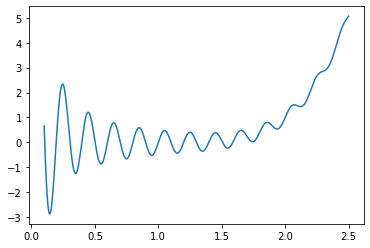

In [21]:
k = lambda x: np.sin(10*np.pi*x)/2/x + (x - 1)**4
xplot = np.linspace(0.1, 2.5, 1000)
kplot = k(xplot)
plt.plot(xplot, kplot)
plt.show()

Clearly, there are many local minima on this domain, but only one global minimum somewhere around $x = 0.1$.  How to find it exactly?  Try out some of our above optimization routines with varied initial guesses.  

For example: 

The for an initial guess of 0.2, the minimum we find is a value of k = -2.874 at x = 0.144.


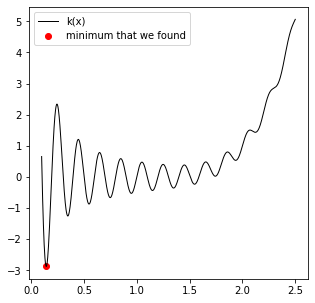

In [22]:
xguess = 0.2
sol = opt.minimize(k,xguess, bounds = [(0.01, 2.5)])
plt.figure(1, figsize = (5, 5))
plt.plot(xplot, kplot, color = 'black', linewidth = 1, label = 'k(x)')
plt.scatter(sol.x[0], sol.fun, color = 'red', marker = 'o', label = 'minimum that we found')
plt.legend()

print(f'The for an initial guess of {xguess}, the minimum we find is a value of k = {k(sol.x[0]):3.3f} at x = {sol.x[0]:3.3f}.')

Notice how hard it is to get these routines to locate the true global minimum.  It is almost a question of a lucky combination of algorithm, initial guess, and/or bounds at this point...

### You may want to try a global optimization algorithm...

This is the type of case where we might be interested in trying out a global optimization routine, of which there are several available in Scipy: `basinhopping`, `brute`, `differential_evolution`, `shgo`, and `dual_annealing`.  They all have fairly similar syntax. You will typically supply the function name (all algorithms), an initial guess (basinhopping), and/or the bounds on the variable(s) (all other algorithms). Here, the syntax for bounds is similar to what we used for opt.minimize, except that we don't need a bounds keyword. 

For example, to look for a minimum with this function using basinhopping:

The for an initial guess of 1, the minimum we find is a value of k = -2.874 at x = 0.144.


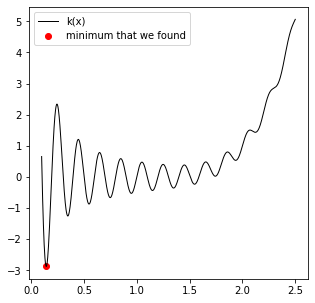

In [23]:
xguess = 1
sol   = opt.basinhopping(k, 1)
plt.figure(1, figsize = (5, 5))
plt.plot(xplot, kplot, color = 'black', linewidth = 1, label = 'k(x)')
plt.scatter(sol.x[0], sol.fun, color = 'red', marker = 'o', label = 'minimum that we found')
plt.legend()

print(f'The for an initial guess of {xguess}, the minimum we find is a value of k = {k(sol.x[0]):3.3f} at x = {sol.x[0]:3.3f}.')

Whereas if you wanted to use dual_annealing, you would supply the function and a range to consider:

The minimum we find is a value of k = -2.874 at x = 0.144.


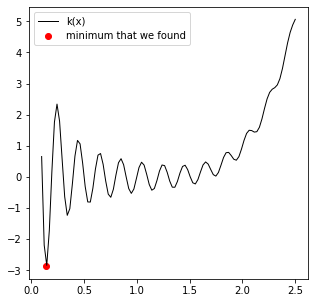

In [24]:
xplot = np.linspace(0.1, 2.5, 100)
kplot = k(xplot)
sol   = opt.dual_annealing(k, [(0.1, 2.5)])
plt.figure(1, figsize = (5, 5))
plt.plot(xplot, kplot, color = 'black', linewidth = 1, label = 'k(x)')
plt.scatter(sol.x[0], sol.fun, color = 'red', marker = 'o', label = 'minimum that we found')
plt.legend()

print(f'The minimum we find is a value of k = {k(sol.x[0]):3.3f} at x = {sol.x[0]:3.3f}.')

Once you get the hang of the basic optimization interface, it is pretty straightforward to switch between optimization methods, but you should check their documentation to confirm as you can find slightly different syntax in each case.
